<a href="https://colab.research.google.com/github/BradHolden415/UT-School-Funding-Fragmentation-Project/blob/main/Royce_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Clear Learning Partners/Database/royce/beginning_database.csv')

FileNotFoundError: ignored

In [ ]:
df.info

<bound method DataFrame.info of          Unnamed: 0            LEA_x school_ID school_num         school_x  \
0                 0  ALPINE DISTRICT         1          1  ALPINE DISTRICT   
1                 1  ALPINE DISTRICT         1          1  ALPINE DISTRICT   
2                 2  ALPINE DISTRICT         1          1  ALPINE DISTRICT   
3                 3  ALPINE DISTRICT         1          1  ALPINE DISTRICT   
4                 4  ALPINE DISTRICT         1          1  ALPINE DISTRICT   
...             ...              ...       ...        ...              ...   
1000297     1000297  SUCCESS ACADEMY       710        710      SUCCESS DSU   
1000298     1000298  SUCCESS ACADEMY       710        710      SUCCESS DSU   
1000299     1000299  SUCCESS ACADEMY       710        710      SUCCESS DSU   
1000300     1000300  SUCCESS ACADEMY       710        710      SUCCESS DSU   
1000301     1000301  SUCCESS ACADEMY       710        710      SUCCESS DSU   

         fund  function  progra

In [ ]:
categories = ['year', 'LEA_ID']
for col in categories:
    df[col] = df[col].astype('category')

In [ ]:
del df['LEA_y']
del df['school_y']
del df['Unnamed: 0']

# removing rows that are completely blank
df.dropna(axis = 0, how = 'all', inplace = True)

In [ ]:
df = df[df.year != 2020.0]

In [ ]:
# seems that there are a lot of duplicated rows, 
# does it make sense to have duplicate rows?
sum(df.duplicated())/df.count() * 100

LEA_x                    11.589228
school_ID                11.589228
school_num               11.589228
school_x                 11.589228
fund                     11.589228
function                 11.589228
program                  11.590045
amt                      11.589228
year                     11.589228
revenue                  11.552332
LEA_ID                   11.614259
test                     12.441363
ENGLISH LANGUAGE ARTS    12.700305
MATHEMATICS              12.727606
SCIENCE                  13.054694
dtype: float64

In [ ]:
df[df.isnull().any(axis=1)]['year'].value_counts()

2018.0    40993
2017.0    22446
2019.0    18921
2021.0    14960
2016.0     7111
2020.0        0
Name: year, dtype: int64

In [ ]:
# calculating the null percentage of each column
for c in df.columns:
    print(str(c) + ": " + str(df[c].isnull().sum() * 100 / len(df[c])))

LEA_x: 0.31836456995516027
school_ID: 0.31836456995516027
school_num: 0.31836456995516027
school_x: 0.31836456995516027
fund: 0.31836456995516027
function: 0.31836456995516027
program: 0.32539003665568067
amt: 0.31836456995516027
year: 0.31836456995516027
revenue: 0.0
LEA_ID: 0.5331959464289676
test: 7.145762411041568
ENGLISH LANGUAGE ARTS: 9.038940806129165
MATHEMATICS: 9.23405157432081
SCIENCE: 11.508207470659432


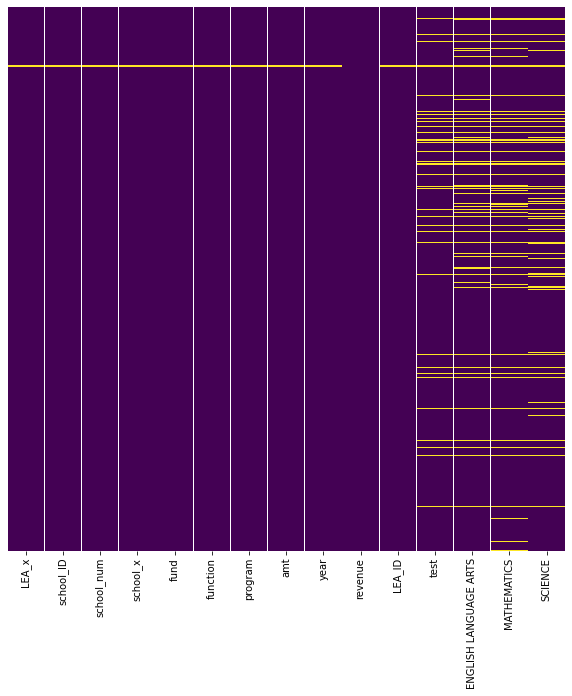

In [ ]:
# visualizing the presence of null values
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
# counting the unique values
for col in ['year', 'test']:
    print(df[col].value_counts())

2021.0    232176
2019.0    196804
2018.0    164788
2017.0    146753
2016.0     68230
2020.0         0
Name: year, dtype: int64
RISE    405918
SAGE    347440
Name: test, dtype: int64


In [ ]:
print(df.describe().T)

                          count          mean           std          min  \
fund                   808751.0     12.611677  8.409294e+00         10.0   
function               808751.0   1930.004820  9.287213e+02       1000.0   
program                808694.0   3672.935705  3.074932e+03          0.0   
amt                    808751.0  90099.942144  1.443461e+06 -126452952.8   
ENGLISH LANGUAGE ARTS  737998.0      0.376974  1.282934e-01          0.0   
MATHEMATICS            736415.0      0.344045  1.492182e-01          0.0   
SCIENCE                717964.0      0.369032  1.463211e-01          0.0   

                               25%         50%           75%           max  
fund                     10.000000    10.00000     10.000000  7.600000e+01  
function               1000.000000  2100.00000   2500.000000  6.400000e+03  
program                  50.000000  5315.00000   5805.000000  9.999000e+03  
amt                     527.770000  3902.59000  20935.940000  2.199674e+08  
ENGLIS

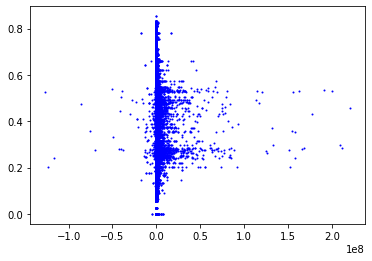

In [ ]:
# plotting revenue amounts vs math proficiency
df_rev = df.loc[df['revenue'] == True]
x = np.array(df_rev['amt'])
y = np.array(df_rev['MATHEMATICS'])
plt.scatter(x, y, s=1, c='b')

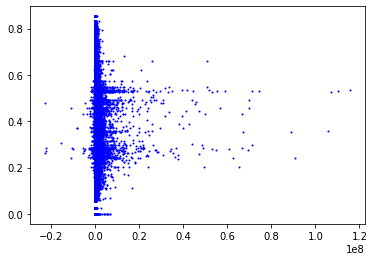

In [ ]:
# plotting expense amounts vs math proficiency
df_exp = df.loc[df['revenue'] == False]
x = np.array(df_exp['amt'])
y = np.array(df_exp['MATHEMATICS'])
plt.scatter(x, y, s=1, c='b')

In [ ]:
df_financial = pd.read_csv('/content/drive/MyDrive/Clear Learning Partners/Database/royce/financial.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# creating a dataframe that details the amount of unique funds per LEA per year
df_financial = df_financial.groupby(['LEA_ID', 'school_ID', 'year', 'revenue'], as_index=False).size()

In [ ]:
# combining this dataframe with educational data
df_financial = df_financial.merge(df[['MATHEMATICS', 'SCIENCE', 'ENGLISH LANGUAGE ARTS', 'school_ID', 'year']], how='left', on=['school_ID', 'year'])

In [ ]:
df_financial = df_financial.drop_duplicates()
df_financial = df_financial[df_financial['LEA_ID'] != -1.0]
df_financial = df_financial[df_financial['year'] != 2020.0]

In [ ]:
df_financial.tail()

,LEA_ID,school_ID,year,revenue,size,MATHEMATICS,SCIENCE,ENGLISH LANGUAGE ARTS
22490885,186506.0,01M,2021.0,True,34,0.223022,0.337209,0.290780
22491261,186579.0,03M,2021.0,False,206,0.233696,0.252033,0.252688
22491735,186579.0,03M,2021.0,True,31,0.233696,0.252033,0.252688
22492211,186581.0,04M,2021.0,False,124,0.246667,0.375000,0.335526
22492501,186581.0,04M,2021.0,True,21,0.246667,0.375000,0.335526


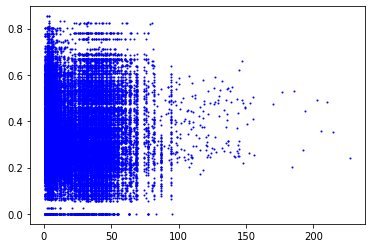

In [ ]:
df_financial_rev = df_financial.loc[df_financial['revenue'] == True]
df_financial_exp = df_financial.loc[df_financial['revenue'] == False]
# plotting the amount of funds vs math proficiency
x = np.array(df_financial_rev['size'])
y = np.array(df_financial_rev['MATHEMATICS'])
plt.scatter(x, y, s=1, c='b')

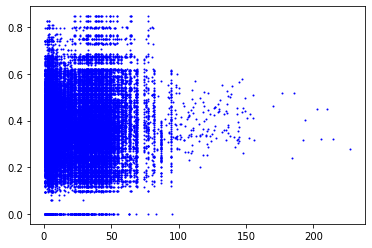

In [ ]:
x = np.array(df_financial_rev['size'])
y = np.array(df_financial_rev['ENGLISH LANGUAGE ARTS'])
plt.scatter(x, y, s=1, c='b')

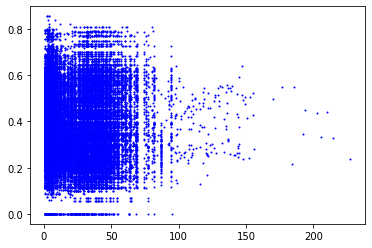

In [ ]:
x = np.array(df_financial_rev['size'])
y = np.array(df_financial_rev['SCIENCE'])
plt.scatter(x, y, s=1, c='b')

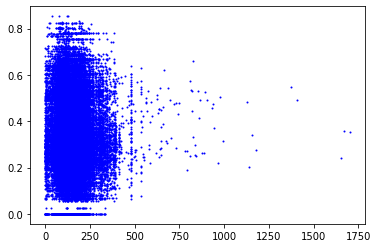

In [ ]:
x = np.array(df_financial_exp['size'])
y = np.array(df_financial_exp['MATHEMATICS'])
plt.scatter(x, y, s=1, c='b')

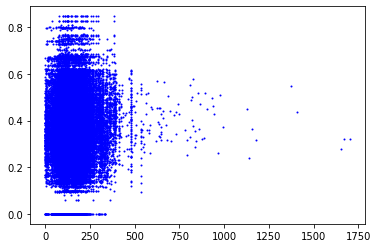

In [ ]:
x = np.array(df_financial_exp['size'])
y = np.array(df_financial_exp['ENGLISH LANGUAGE ARTS'])
plt.scatter(x, y, s=1, c='b')

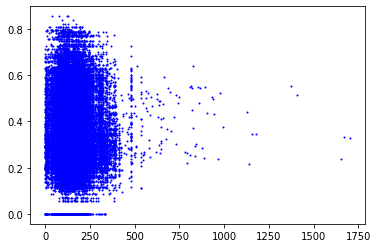

In [ ]:
x = np.array(df_financial_exp['size'])
y = np.array(df_financial_exp['SCIENCE'])
plt.scatter(x, y, s=1, c='b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f179807bfd0>]],
      dtype=object)

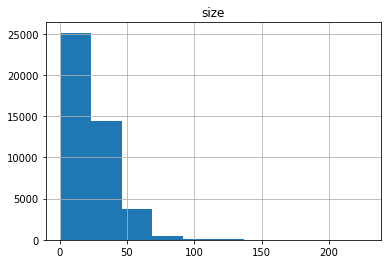

In [ ]:
df_financial_rev.hist(['size'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1798348190>]],
      dtype=object)

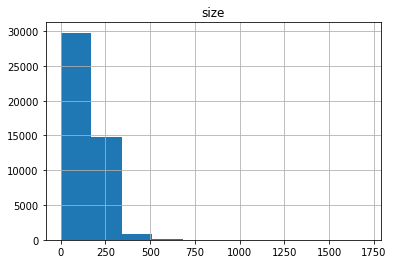

In [ ]:
df_financial_exp.hist(['size'])

In [ ]:
df[['MATHEMATICS', 'SCIENCE', 'ENGLISH LANGUAGE ARTS']].corr()

,MATHEMATICS,SCIENCE,ENGLISH LANGUAGE ARTS
MATHEMATICS,1.000000,0.871008,0.843437
SCIENCE,0.871008,1.000000,0.826704
ENGLISH LANGUAGE ARTS,0.843437,0.826704,1.000000


In [ ]:
df['amt_sqrt'] = df['amt']**(1/2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


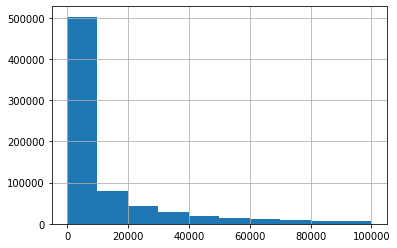

In [ ]:
df[(df['amt']>0) & (df['amt']<100000)]['amt'].hist()

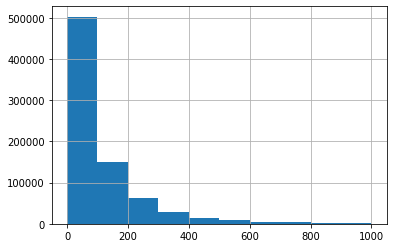

In [ ]:
df[(df['amt_sqrt']>0) & (df['amt_sqrt']<1000)]['amt_sqrt'].hist()

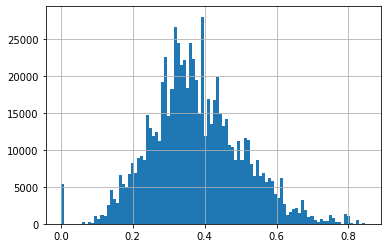

In [ ]:
df['ENGLISH LANGUAGE ARTS'].hist(bins=100)

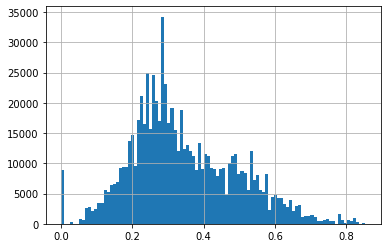

In [ ]:
df['MATHEMATICS'].hist(bins=100)

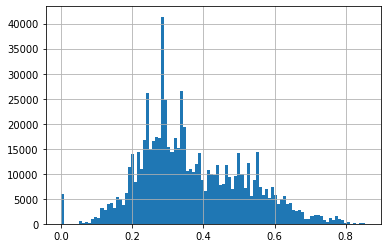

In [ ]:
df['SCIENCE'].hist(bins=100)

In [ ]:
df[(df['amt']>0) & (df['amt']<1000000)][['MATHEMATICS', 'ENGLISH LANGUAGE ARTS', 'SCIENCE', 'amt']].corr(method='spearman')

,MATHEMATICS,ENGLISH LANGUAGE ARTS,SCIENCE,amt
MATHEMATICS,1.000000,0.824321,0.841702,0.030558
ENGLISH LANGUAGE ARTS,0.824321,1.000000,0.795216,0.028758
SCIENCE,0.841702,0.795216,1.000000,0.017168
amt,0.030558,0.028758,0.017168,1.000000


In [ ]:
df.isnull().sum()

LEA_x                     2583
school_ID                 2583
school_num                2583
school_x                  2583
fund                      2583
function                  2583
program                   2640
amt                       2583
year                      2583
revenue                      0
LEA_ID                    4326
test                     57976
ENGLISH LANGUAGE ARTS    73336
MATHEMATICS              74919
SCIENCE                  93370
amt_sqrt                 16350
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


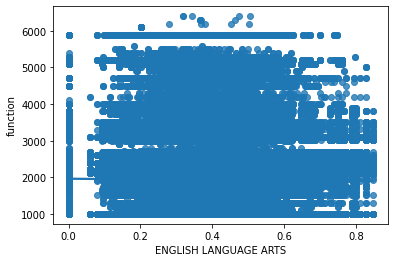

In [ ]:
sns.regplot(df['ENGLISH LANGUAGE ARTS'], df['function'])

In [ ]:
df.columns

Index(['LEA_x', 'school_ID', 'school_num', 'school_x', 'fund', 'function',
       'program', 'amt', 'year', 'revenue', 'LEA_ID', 'test',
       'ENGLISH LANGUAGE ARTS', 'MATHEMATICS', 'SCIENCE', 'amt_sqrt'],
      dtype='object')

In [ ]:
df['proficiency'] = df[['MATHEMATICS', 'SCIENCE', 'ENGLISH LANGUAGE ARTS']].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Average aggregate test scores by RISE and SAGE testing.
df.groupby ('test').proficiency.mean()

test
RISE    0.344748
SAGE    0.378417
Name: proficiency, dtype: float64

In [ ]:
# Average Math test scores by RISE and SAGE testing.
df.groupby ('test').MATHEMATICS.mean()

test
RISE    0.316621
SAGE    0.376950
Name: MATHEMATICS, dtype: float64

In [ ]:
# Average Math test scores by RISE and SAGE testing.
df.groupby ('test').SCIENCE.mean()

test
RISE    0.351236
SAGE    0.391329
Name: SCIENCE, dtype: float64

In [ ]:
# Average aggregate test scores by year.
df.groupby ('year').proficiency.mean()

year
2016.0    0.459779
2017.0    0.454690
2018.0    0.281453
2019.0    0.274907
2020.0         NaN
2021.0    0.403531
Name: proficiency, dtype: float64

In [ ]:
# Math test scores by year.
df.groupby('year').MATHEMATICS.mean()

year
2016.0    0.463122
2017.0    0.459347
2018.0    0.269183
2019.0    0.249669
2020.0         NaN
2021.0    0.372623
Name: MATHEMATICS, dtype: float64

In [ ]:
# Science test scores by year.
df.groupby('year').SCIENCE.mean()

year
2016.0    0.475822
2017.0    0.473974
2018.0    0.271143
2019.0    0.266071
2020.0         NaN
2021.0    0.421408
Name: SCIENCE, dtype: float64

In [ ]:
# determining variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [ ]:
# years = [2016.0, 2017.0, 2018.0, 2019.0, 2021.0]
# null_dict = {}
# for col in df_stack.columns:
#   data = []
#   if type(col) == float:
#     for year in years:
#       df_year = df_stack[df_stack['year']==year]
#       data.append(len(df_year[col]) - df_year[col].isnull().sum()) 
#     null_dict[col] = data
# null_dict_3 = {}
# for fund in null_dict.keys():
#   count=0
#   for x in null_dict[fund]:
#     if x != 0:
#       count+=1
#   if count > 2:
#     null_dict_3[fund] = null_dict[fund]